# ODE with periodic solution

Consider the ODE system
$$
x' = -y, \qquad y' = x
$$
with initial condition
$$
x(0) = 1, \qquad y(0) = 0
$$
The exact solution is
$$
x(t) = \cos(t), \qquad y(t) = \sin(t)
$$
This solution is periodic. It also has a quadratic invariant
$$
x^2(t) + y^2(t) = 1, \qquad \forall t
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

## Forward Euler scheme

In [2]:
def ForwardEuler(h,T):
    N = int(T/h)
    x,y = np.zeros(N),np.zeros(N)
    x[0] = 1.0
    y[0] = 0.0
    for n in range(1,N):
        x[n] = x[n-1] - h*y[n-1]
        y[n] = y[n-1] + h*x[n-1]
    return x,y

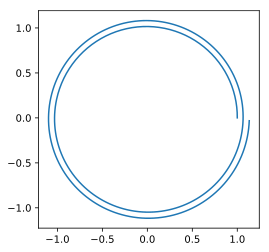

In [3]:
h = 0.02
T = 4.0*np.pi
x,y = ForwardEuler(h,T)

plt.plot(x,y)
plt.axes().set_aspect('equal')

The phase space trajectory is spiralling outward.

## Backward Euler scheme

$$
x_n = x_{n-1} - h y_n, \qquad y_n = y_{n-1} + h x_n
$$
Eliminate $y_n$ from first equation to get
$$
x_n = \frac{x_{n-1} - h y_{n-1}}{1 + h^2}
$$

In [4]:
def BackwardEuler(h,T):
    N = int(T/h)
    x,y = np.zeros(N),np.zeros(N)
    x[0] = 1.0
    y[0] = 0.0
    for n in range(1,N):
        x[n] = (x[n-1] - h*y[n-1])/(1.0 + h**2)
        y[n] = y[n-1] + h*x[n]
    return x,y

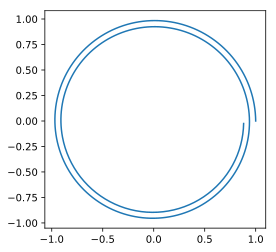

In [5]:
h = 0.02
T = 4.0*np.pi
x,y = BackwardEuler(h,T)

plt.plot(x,y)
plt.axes().set_aspect('equal')

The phase space trajectory is spiralling inward.

## Trapezoidal scheme

$$
x_n = x_{n-1} - \frac{h}{2}(y_{n-1} + y_n), \qquad y_n = y_{n-1} + \frac{h}{2}(x_{n-1} + x_n)
$$
Eliminate $y_n$ from first equation
$$
x_n = \frac{ (1-\frac{1}{4}h^2) x_{n-1} - h y_{n-1} }{1 + \frac{1}{4}h^2}
$$

In [6]:
def Trapezoid(h,T):
    N = int(T/h)
    x,y = np.zeros(N),np.zeros(N)
    x[0] = 1.0
    y[0] = 0.0
    for n in range(1,N):
        x[n] = ((1.0-0.25*h**2)*x[n-1] - h*y[n-1])/(1.0 + 0.25*h**2)
        y[n] = y[n-1] + 0.5*h*(x[n-1] + x[n])
    return x,y

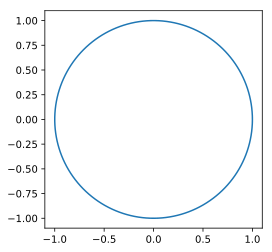

In [7]:
h = 0.02
T = 4.0*np.pi
x,y = Trapezoid(h,T)

plt.plot(x,y)
plt.axes().set_aspect('equal')

The phase space trajectory is exactly the unit circle. 

Multiply first equation by $x_n + x_{n-1}$ and second equation by $y_n + y_{n-1}$
$$
(x_n + x_{n-1})(x_n - x_{n-1}) = - \frac{h}{2}(x_n + x_{n-1})(y_n + y_{n-1})
$$
$$
(y_n + y_{n-1})(y_n - y_{n-1}) = + \frac{h}{2}(x_n + x_{n-1})(y_n + y_{n-1})
$$
Adding the two equations we get
$$
x_n^2 + y_n^2 = x_{n-1}^2 + y_{n-1}^2
$$
Thus the Trapezoidal method is able to preserve the invariant.